In [1]:
with open('looking.html', 'r', encoding='utf-8') as file:
    html = file.read() 
print(html)

<html class="theme theme--mercado artdeco osx" lang="en"><head>
  <script type="application/javascript">!function(i,n){void 0!==i.addEventListener&&void 0!==i.hidden&&(n.liVisibilityChangeListener=function(){i.hidden&&(n.liHasWindowHidden=!0)},i.addEventListener("visibilitychange",n.liVisibilityChangeListener))}(document,window);</script>
  <title>(3) "nft" | Search | LinkedIn</title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta class="mercado-icons-sprite" content="https://static.licdn.com/aero-v1/sc/h/2brfqc2ezdcl00afxrykl5mid" id="artdeco-icons/static/images/sprite-asset" name="asset-url"/>
  <meta content="" name="description"/>
  <meta content="notranslate" name="google"/>
  <meta content="voyager-web" name="service"/>
  <meta content="#ffffff" id="theme-color-meta-tag" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0" name="viewport"/>
  <meta content="https://static.licdn.com/aero-v1/sc/h

In [2]:
def extract_substrings(input_string, separation):

    occurrences = input_string.split(separation)
   

   

    return occurrences

separation = """Feed post"""
output = extract_substrings(html, separation)
print(len(output))


21


In [3]:
! pip install selenium

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [4]:
# Before you start:
# 1. set the path to chromedriver
# 2. set the path where the files are to be saved

# to work with the site:
import requests
import selenium
import webbrowser
from selenium import webdriver
from selenium.webdriver.common.by import By

# to download html:
from bs4 import BeautifulSoup

# to write the files:
from datetime import date
import os

import re

import pandas as pd
import numpy as np
import time

In [5]:
def get_description(html):
    # html = html.to_string()
    # soup = BeautifulSoup(html, 'html.parser')
    break_words_spans = html.find_all('span', class_='break-words')
    extracted_texts = []
    elementRemove = ["Home", "My Network", "Jobs", "Messaging","Notifications" ]

    for break_words_span in break_words_spans:
     
        new_text = break_words_span.get_text(separator=' ', strip=True)

        
        if  new_text not in elementRemove:
            extracted_texts.append(new_text)



    return extracted_texts


In [6]:
def get_names_header(html):
    atags = html.find_all('a', class_ ='app-aware-link update-components-actor__meta-link')
    
    result = []
    for tag in atags:
        #working
        aria_label = tag['aria-label']
        aria_label = aria_label.replace("View: ", "") 
        
        result.append(aria_label)
    return result

In [7]:
def get_reactions(html):
    reactions = html.find_all('button', class_ ='t-black--light display-flex align-items-center social-details-social-counts__count-value t-12 hoverable-link-text')
   
    result = []

    for r in reactions:
        new_text = r.get_text(separator=' ', strip=True)
        result.append(new_text)
    return result


In [8]:
descriptions = []
names = []
reactions = []
#for each feed post separation
for i in output:
    soup = BeautifulSoup(i, 'html.parser')
    
    #extracting description
    descript = get_description(soup)
    descriptions.append(descript)
    
    #extracting users
    author = get_names_header(soup)
    names.append(author)
    
    #extracting reactions
    reaction = get_reactions(soup)
    
    if len(reaction) == 0:
        reactions.append(["0"])
    else:
        reactions.append(reaction)
    
    
    
    
    
    
    
    
    
    


    

In [9]:
for index, text in enumerate(names, 1):
    print(f"Element {index} of the list:", text)

Element 1 of the list: []
Element 2 of the list: ['Matías Ricardo Méndez Sandoval (He/him) • You Data | Artificial Intelligence | Machine Learning']
Element 3 of the list: ['AYMARD NGUEMO • 1st Master student in ArtificiaI intelligence &amp; Data Science at Aivancity with experience as a full stack developer looking for an internship']
Element 4 of the list: ['SKOR Metaverse 780 followers']
Element 5 of the list: ['Pierre-Nicolas Hurstel • Following CEO &amp; Co-founder @Arianee']
Element 6 of the list: ['Joy Joe • 3rd+ Marketing and Community management for Web3 Businesses', 'DualMint 816 followers']
Element 7 of the list: ['Alexandre Mare • 1st COO @ Arianee', 'Arianee 12,848 followers']
Element 8 of the list: ['AYMARD NGUEMO • 1st Master student in ArtificiaI intelligence &amp; Data Science at Aivancity with experience as a full stack developer looking for an internship']
Element 9 of the list: ['Hamid Rhazi • 3rd+ 💎j&#39;aide les multinationales à investire dans l&#39;humanitaire i

In [10]:
for index, text in enumerate(reactions, 1):
    print(f"Element {index} of the list:", text)

Element 1 of the list: ['0']
Element 2 of the list: ['14 Auriane Marty and 13 others']
Element 3 of the list: ['34 AYMARD NGUEMO and 33 others']
Element 4 of the list: ['181']
Element 5 of the list: ['52 Auriane Marty and 51 others']
Element 6 of the list: ['1']
Element 7 of the list: ['13 Carijn Xiu Stoute and 12 others']
Element 8 of the list: ['18']
Element 9 of the list: ['0']
Element 10 of the list: ['0']
Element 11 of the list: ['18']
Element 12 of the list: ['4']
Element 13 of the list: ['26']
Element 14 of the list: ['182 Auriane Marty and 181 others']
Element 15 of the list: ['0']
Element 16 of the list: ['6']
Element 17 of the list: ['63']
Element 18 of the list: ['54']
Element 19 of the list: ['59 Zoé Daguenet and 58 others']
Element 20 of the list: ['16']
Element 21 of the list: ['11']


In [11]:
for index, text in enumerate(descriptions, 1):
    print(f"Element {index} of the list:", text)

Element 1 of the list: []
Element 2 of the list: ["Last week I had the pleasure to NFT Paris by the hand of Arianee . Witnessing the transformative power of Web3 and NFTs in reshaping the concept of ownership, particularly in relation to our personal data, left me inspired and eager to delve deeper into the evolving landscape of decentralized technologies. The event sparked valuable insights, and I'm excited to continue navigating the dynamic realm of blockchain innovations. #NFTParis #Web3 #OwnershipRevolution"]
Element 3 of the list: ['Hello everyone Today, my friends Asma Ghamacha , Hermes Yan NTJAM NDJENG , Harold Geumtcheng , Aloys Aymrick Nzooh , Bryan Fozame and I had the chance to be part of the NFT Paris conference thanks to our school aivancity School for Technology, Business & Society Paris-Cachan where we learned a wealth of new information about blockchain, metaverse, web3 and its use cases across various industries such as finance, gaming, luxury, and more. During this en

In [12]:
file_path = 'descriptions_pre_NLP.txt'



# Open the file in write mode
with open(file_path, 'w') as file:
    # Iterate over the list
    for item in descriptions:
        # Write each item to the file, followed by a newline
        file.write('%s\n' % item)


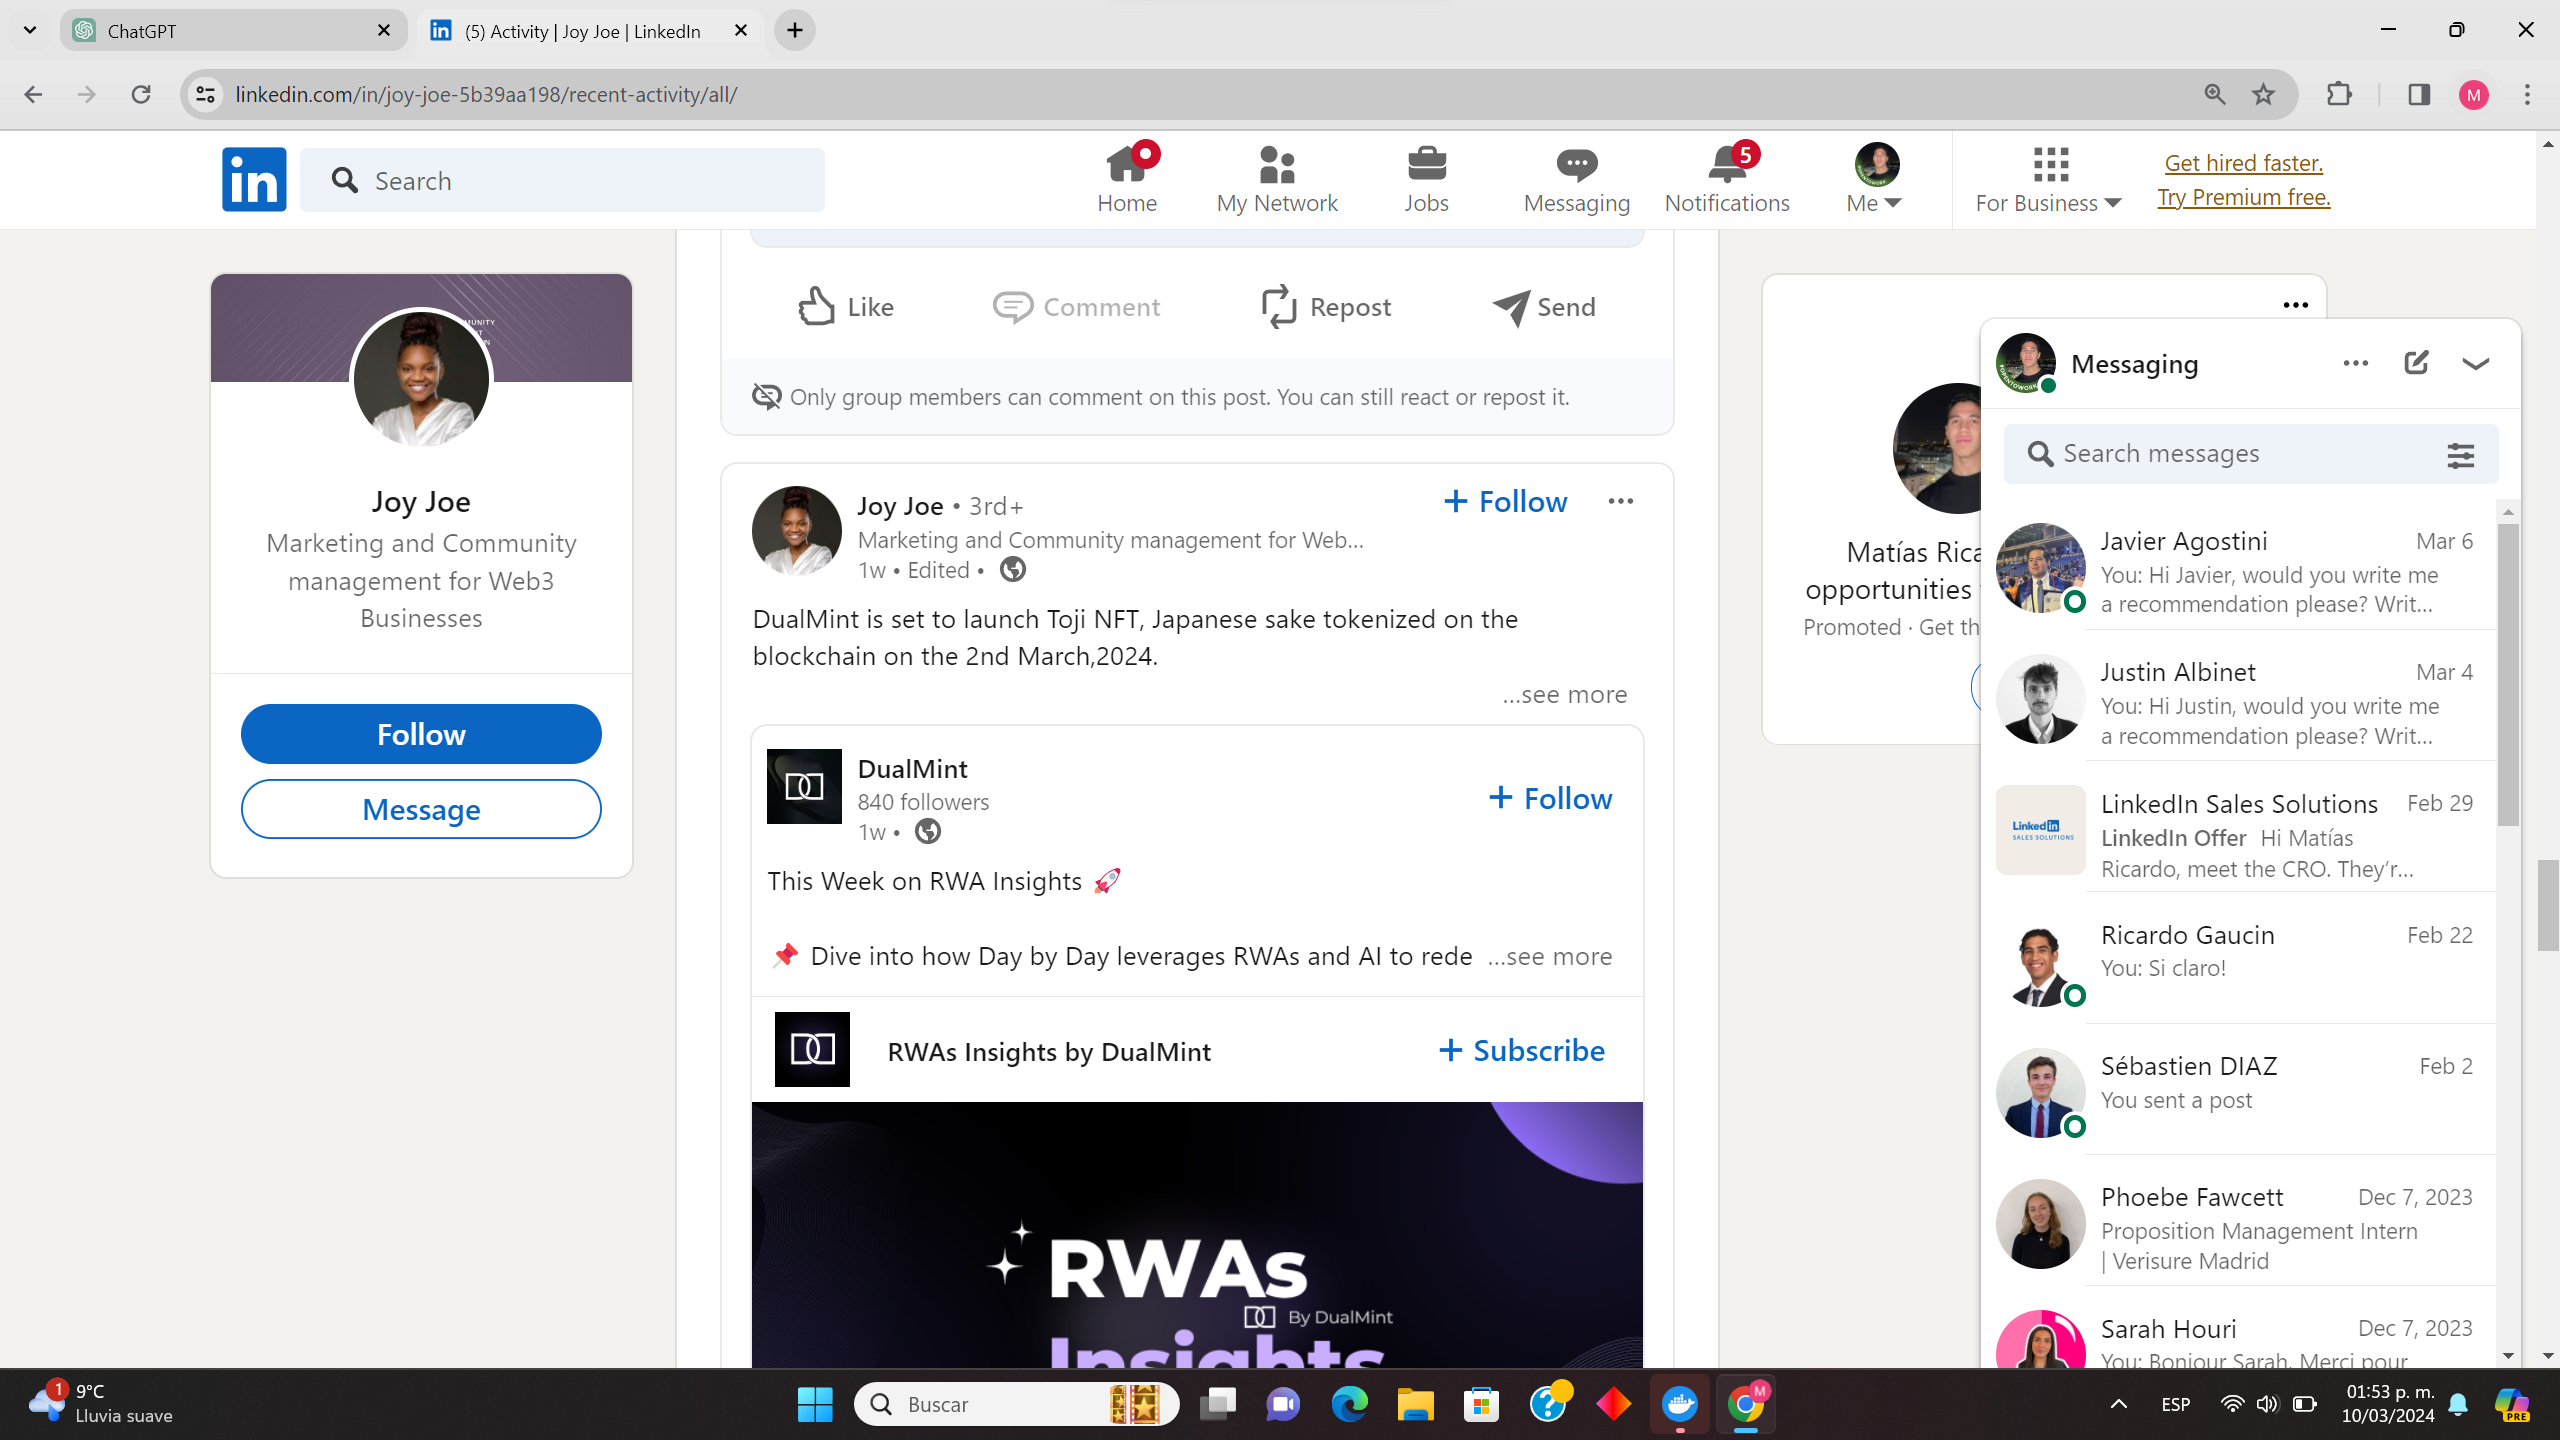

Figure 1: Shared post

# Facts
- the hidden keyword "Feed post" in the html is the way each post is separated 
- If the post is built up of a shared post like in figure 1, you will receive a list with the outer description and the inner description